# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import yfinance as yf
from MCForecastTools import MCSimulation
import datetime as dt
import numpy as np

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

False

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()

btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"]
print(btc_price)

# Fetch current ETH price
eth_data = requests.get(eth_url).json()

eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"]
print(eth_price)

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

22589.59989
1639.9812
The current value of your 1.2 BTC is $27107.52
The current value of your 5.3 ETH is $8691.90


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [ ]:
# Set Alpaca API key and secret
# YOUR CODE HERE!

# Create the Alpaca API object
# YOUR CODE HERE!

In [14]:
# Set the tickers
tickers = ["agg", "spy"]

# Set DataFrames
agg_data = yf.Ticker(tickers[0])
spy_data = yf.Ticker(tickers[1])

# Format current date as ISO format
start_date = dt.datetime(2022, 12, 30)
end_date = dt.datetime(2022, 12, 31)

agg_df = pd.DataFrame(agg_data.history(
    period='1d', start=start_date, end=end_date))
agg_df.insert(0, "Symbol", 'AGG')
spy_df = pd.DataFrame(spy_data.history(
    period='1d', start=start_date, end=end_date))
spy_df.insert(0, "Symbol", 'SPY')

# Get current closing prices for SPY and AGG
agg_close_price = agg_df.iloc[0, 4]
spy_close_price = spy_df.iloc[0, 4]

# Concatenate the ticker DataFrames
ticker_data = pd.concat([agg_df, spy_df], axis="rows", join="inner")

# Preview DataFrame
ticker_data.head()

,Symbol,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2022-12-30 00:00:00-05:00,AGG,97.250000,97.360001,96.970001,96.989998,8469000,0,0
2022-12-30 00:00:00-05:00,SPY,380.640015,382.579987,378.429993,382.429993,83975100,0,0


In [15]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $96.98999786376953
Current SPY closing price: $382.42999267578125


In [16]:
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19121.50
The current value of your 200 AGG shares is $19398.00


### Savings Health Analysis

In [17]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
stocks_value = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings = pd.DataFrame(
    data=[crypto_value, stocks_value], index=["crypto", "shares"], columns=["amount"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,35799.420228
shares,38519.499207


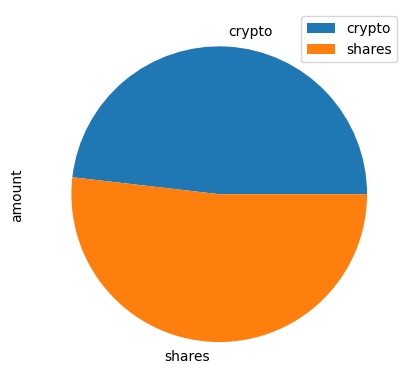

In [18]:
# Plot savings pie chart
savings_pie_chart = df_savings.plot.pie(y="amount")

In [19]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + stocks_value

# Validate saving health
if(total_savings >= emergency_fund):
    print("Congratulations! You have enough money in the emergency fund.")
elif(total_savings < emergency_fund):
    print(
        f"Sorry! You need ${emergency_fund - total_savings} to reach your goal.")

Congratulations! You have enough money in the emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = dt.datetime(2016, 5, 1)
end_date = dt.datetime(2021, 5, 1)

In [21]:
# Get 5 years' worth of historical data for SPY and AGG
# Format current date as ISO format
start_date = dt.datetime(2016, 5, 1)
end_date = dt.datetime(2021, 5, 1)

agg_5y_df = pd.DataFrame(agg_data.history(
    period='1d', start=start_date, end=end_date))
spy_5y_df = pd.DataFrame(spy_data.history(
    period='1d', start=start_date, end=end_date))

# Reorganize the DataFrame
# Separate ticker data
weights = [0.6, 0.4]


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg_5y_df, spy_5y_df],
                          axis=1, join="inner", keys=["AGG", "SPY"])
df_stock_data = df_stock_data.rename(columns=str.lower)
# Display sample data
df_stock_data.head()

agg                                   \
                                open       high        low      close   
Date                                                                    
2016-05-02 00:00:00-04:00  94.577264  94.577264  94.389372  94.466240   
2016-05-03 00:00:00-04:00  94.705387  94.756628  94.585821  94.637062   
2016-05-04 00:00:00-04:00  94.722431  94.739509  94.594322  94.679726   
2016-05-05 00:00:00-04:00  94.730955  94.935931  94.628473  94.918846   
2016-05-06 00:00:00-04:00  94.901813  94.901813  94.773705  94.773705   

                                                                  spy  \
                            volume dividends stock splits        open   
Date                                                                    
2016-05-02 00:00:00-04:00  3553900     0.205            0  183.380315   
2016-05-03 00:00:00-04:00  3044900     0.000            0  183.025849   
2016-05-04 00:00:00-04:00  2920200     0.000            0  181.669922   
2016-05-05 00:00:00-04:00  3008100     0.000            0  182.175053   
2016-05-06 00:00:00-04:00  2718500     0.000            0  180.845721   

                                                                          \
                                 high         low       close     volume   
Date                                                                       
2016-05-02 00:00:00-04:00  184.496970  182.928339  184.310867   62188000   
2016-05-03 00:00:00-04:00  183.273994  181.926909  182.706802  106422100   
2016-05-04 00:00:00-04:00  182.432087  181.164760  181.687637   92243800   
2016-05-05 00:00:00-04:00  182.547271  181.209057  181.652176   67619200   
2016-05-06 00:00:00-04:00  182.361194  180.686205  182.316879   89315000   

                                                  
                          dividends stock splits  
Date                                              
2016-05-02 00:00:00-04:00       0.0            0  
2016-05-03 00:00:00-04:00       0.0            0  
2016-05-04 00:00:00-04:00       0.0            0  
2016-05-05 00:00:00-04:00       0.0            0  
2016-05-06 00:00:00-04:00       0.0            0

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# Set number of simulations
num_sims = 500
MC_PORTFOLIO = MCSimulation(
    portfolio_data=df_stock_data,
    weights=weights,
    num_simulation=num_sims,
    num_trading_days=252 * 30
)

In [26]:
# Printing the simulation input data
df_stock_data

agg                                      \
                                 open        high         low       close   
Date                                                                        
2016-05-02 00:00:00-04:00   94.577264   94.577264   94.389372   94.466240   
2016-05-03 00:00:00-04:00   94.705387   94.756628   94.585821   94.637062   
2016-05-04 00:00:00-04:00   94.722431   94.739509   94.594322   94.679726   
2016-05-05 00:00:00-04:00   94.730955   94.935931   94.628473   94.918846   
2016-05-06 00:00:00-04:00   94.901813   94.901813   94.773705   94.773705   
...                               ...         ...         ...         ...   
2021-04-26 00:00:00-04:00  110.731788  110.789697  110.644936  110.644936   
2021-04-27 00:00:00-04:00  111.108171  111.108171  110.374725  110.374725   
2021-04-28 00:00:00-04:00  110.451946  110.471251  110.210679  110.432648   
2021-04-29 00:00:00-04:00  110.152757  110.374725  110.104500  110.374725   
2021-04-30 00:00:00-04:00  110.413340  110.519490  110.336133  110.490540   

                                                                  spy  \
                            volume dividends stock splits        open   
Date                                                                    
2016-05-02 00:00:00-04:00  3553900     0.205            0  183.380315   
2016-05-03 00:00:00-04:00  3044900     0.000            0  183.025849   
2016-05-04 00:00:00-04:00  2920200     0.000            0  181.669922   
2016-05-05 00:00:00-04:00  3008100     0.000            0  182.175053   
2016-05-06 00:00:00-04:00  2718500     0.000            0  180.845721   
...                            ...       ...          ...         ...   
2021-04-26 00:00:00-04:00  3480300     0.000            0  406.700022   
2021-04-27 00:00:00-04:00  3823300     0.000            0  407.177379   
2021-04-28 00:00:00-04:00  7078600     0.000            0  407.060466   
2021-04-29 00:00:00-04:00  6254100     0.000            0  409.505914   
2021-04-30 00:00:00-04:00  6469500     0.000            0  406.885094   

                                                                          \
                                 high         low       close     volume   
Date                                                                       
2016-05-02 00:00:00-04:00  184.496970  182.928339  184.310867   62188000   
2016-05-03 00:00:00-04:00  183.273994  181.926909  182.706802  106422100   
2016-05-04 00:00:00-04:00  182.432087  181.164760  181.687637   92243800   
2016-05-05 00:00:00-04:00  182.547271  181.209057  181.652176   67619200   
2016-05-06 00:00:00-04:00  182.361194  180.686205  182.316879   89315000   
...                               ...         ...         ...        ...   
2021-04-26 00:00:00-04:00  407.459952  406.086226  406.865631   52182400   
2021-04-27 00:00:00-04:00  407.381997  405.589311  406.777924   51303100   
2021-04-28 00:00:00-04:00  408.229604  406.173875  406.661011   51238900   
2021-04-29 00:00:00-04:00  409.895617  405.725735  409.252594   78544300   
2021-04-30 00:00:00-04:00  407.771685  405.628276  406.563568   85527000   

                                                  
                          dividends stock splits  
Date                                              
2016-05-02 00:00:00-04:00       0.0            0  
2016-05-03 00:00:00-04:00       0.0            0  
2016-05-04 00:00:00-04:00       0.0            0  
2016-05-05 00:00:00-04:00       0.0            0  
2016-05-06 00:00:00-04:00       0.0            0  
...                             ...          ...  
2021-04-26 00:00:00-04:00       0.0            0  
2021-04-27 00:00:00-04:00       0.0            0  
2021-04-28 00:00:00-04:00       0.0            0  
2021-04-29 00:00:00-04:00       0.0            0  
2021-04-30 00:00:00-04:00       0.0            0  

[1259 rows x 14 columns]

In [27]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
cumulative_returns = MC_PORTFOLIO.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.


/Users/jon/Programming/FinTech/Homework/api-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jon/Programming/FinTech/Homework/api-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jon/Programming/FinTech/Homework/api-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.


/Users/jon/Programming/FinTech/Homework/api-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jon/Programming/FinTech/Homework/api-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jon/Programming/FinTech/Homework/api-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.


/Users/jon/Programming/FinTech/Homework/api-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jon/Programming/FinTech/Homework/api-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jon/Programming/FinTech/Homework/api-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

Running Monte Carlo simulation number 350.
Running Monte Carlo simulation number 360.
Running Monte Carlo simulation number 370.
Running Monte Carlo simulation number 380.
Running Monte Carlo simulation number 390.
Running Monte Carlo simulation number 400.
Running Monte Carlo simulation number 410.
Running Monte Carlo simulation number 420.
Running Monte Carlo simulation number 430.
Running Monte Carlo simulation number 440.


/Users/jon/Programming/FinTech/Homework/api-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jon/Programming/FinTech/Homework/api-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jon/Programming/FinTech/Homework/api-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

Running Monte Carlo simulation number 450.
Running Monte Carlo simulation number 460.
Running Monte Carlo simulation number 470.
Running Monte Carlo simulation number 480.
Running Monte Carlo simulation number 490.


/Users/jon/Programming/FinTech/Homework/api-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jon/Programming/FinTech/Homework/api-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/jon/Programming/FinTech/Homework/api-homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resu

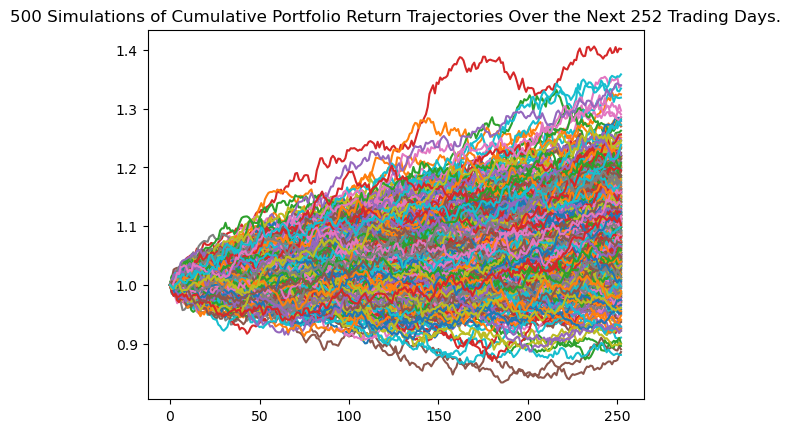

In [28]:
# Plot simulation outcomes
line_plot = MC_PORTFOLIO.plot_simulation()

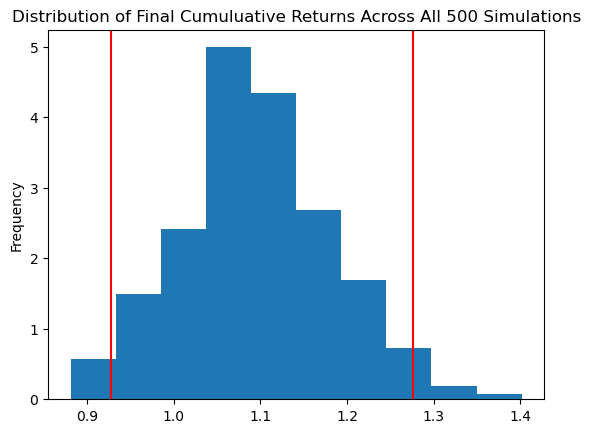

In [29]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_PORTFOLIO.plot_distribution()

### Retirement Analysis

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_PORTFOLIO.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              1.095063
std               0.087658
min               0.880827
25%               1.039040
50%               1.090383
75%               1.149247
max               1.401659
95% CI Lower      0.927540
95% CI Upper      1.275924
Name: 252, dtype: float64


/Users/jon/Programming/FinTech/Homework/api-homework/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [38]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = summary["95% CI Lower"]
ci_upper = summary["95% CI Upper"]

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $0.9275402580925025 and $1.2759235838865783


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [39]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $0.9275402580925025 and $1.2759235838865783


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


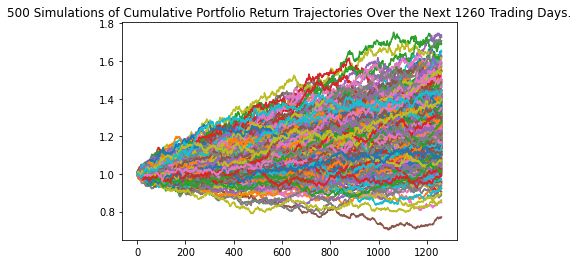

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

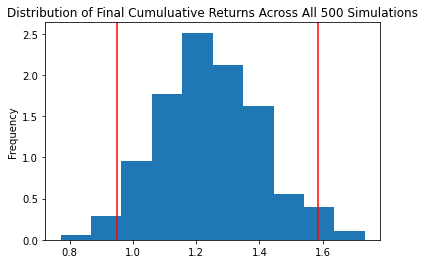

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


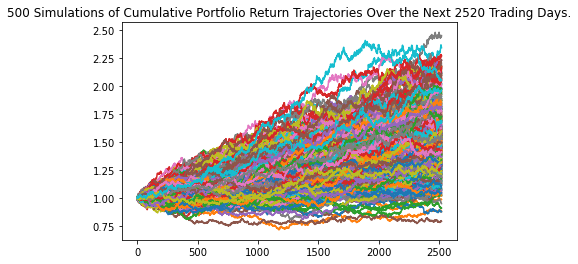

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

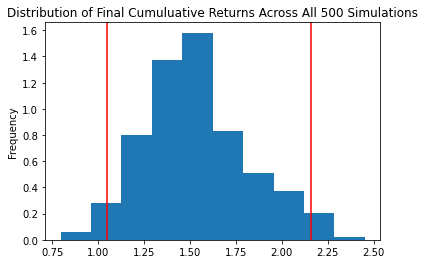

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
